File to store and analyse data for half-wave plate rotation time between ten degree interrupts.

### __Interrupt times are in milliseconds__.

In [1]:
#Preamble

import pandas as pd
import math
import numpy as np
import lmfit as fit
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set_style("whitegrid")

In [2]:
# Rounding functions to get bin values
def roundDownToNearestTen(x):
    return int(math.floor(x/10))*10

def roundUpToNearestTen(x):
    return int(math.ceil(x/10))*10

Average = 3.6913620689655176
Standard Deviation = 0.1925884061760222


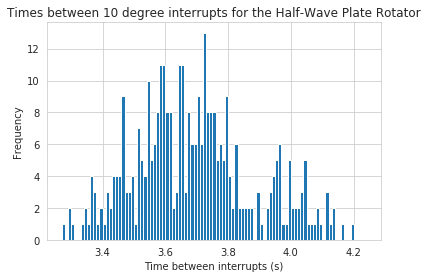

In [3]:
# ----------Read in file--------------
times = []
df = pd.read_csv('Time_between_interrupts.csv')
times = df['Times_between_interrupts'].tolist()

#----------Make bins-----------
bin_width = 10
min_bin_val = roundDownToNearestTen(min(times))
max_bin_val = roundUpToNearestTen(max(times))
no_of_bins = int((max_bin_val - min_bin_val)/bin_width)

bins = []
for i in range(no_of_bins - 1):
    bins.append(min_bin_val + i*bin_width)

# Convert to seconds
bins = [(lambda x: x/1000)(x) for x in bins]
times = [(lambda x: x/1000)(x) for x in times]

#--------Make histogram------------
fig, ax = plt.subplots()
plt.title("Times between 10 degree interrupts for the Half-Wave Plate Rotator")
ax.hist(times, bins)
ax.set_xlabel("Time between interrupts (s)")
ax.set_ylabel("Frequency")
# Save the figure
plt.savefig('times_between_interrupts.pdf')

#------------Statistics--------------
avg_time = sum(times)/len(times)  #Average
print('Average =', avg_time)

std_dev_sum = 0  #Standard deviation
for t in times:
    std_dev_sum += np.power((t - avg_time), 2)
std_dev = np.power(std_dev_sum/len(times), 0.5)
print('Standard Deviation =', std_dev)